<a href="https://colab.research.google.com/github/suphalaksana/Multivariate/blob/main/Chapter_3_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Projection 

ลูกศร คือการฉายแสง

Projection

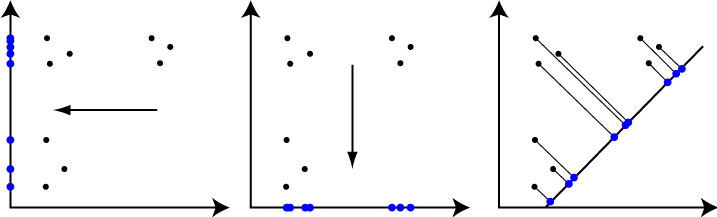

#PCA (Principle Component Analysis)



1.   Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)
2.   Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)
3.   Computing the Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)
4.   Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ   eigens ที่จำเป็น)
5.   Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนแกนใหม่)


https://wendynavarrete.com/principal-component-analysis-with-numpy/



#PCA step by step

In [44]:
import pandas as pd


#load data

In [45]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv')

In [46]:
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


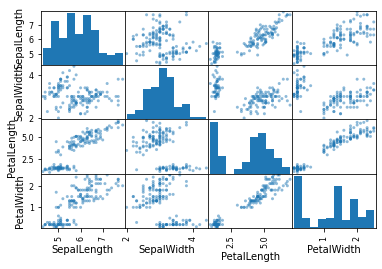

In [47]:
pd.plotting.scatter_matrix(example_df);


In [48]:
import numpy as np

In [49]:
data_matrix =  np.array (example_df.iloc[:,:-1])#มอง Data ของเราเป็น matrix   #แถวเอาทั้งหมด หลักเอาก่อน สุดท้าย [:,:-1]
data_matrix

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [50]:
data_matrix = data_matrix.T #พร้อมนำไปใช้
print(data_matrix.shape)
data_matrix

(4, 150)


array([[5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
        4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
        5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
        5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
        6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
        6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
        6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
        6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
        6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
        7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
        7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
        6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9],
       [3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
        3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       

#1. Standardizing the Data (ปรับ mean และ std ให้ มี mean=0 std=1)

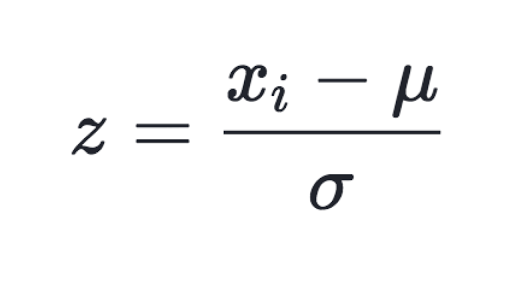

## วิธีซับซ้อน

In [51]:
meanD =  np.mean(data_matrix, axis=1) #หา mean 
meanD

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [52]:
stdD = np.std(data_matrix,axis=1)
stdD

array([0.82530129, 0.43214658, 1.75852918, 0.76061262])

In [53]:
zeromatrix = np.zeros((4,10))
zeromatrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
zeromatrix-meanD

ValueError: ignored

In [ ]:
zeromatrix-meanD.reshape((4,1)) ## reshape บังคับขนาดของ matrix ให้เป็นไปตามที่เราต้องการ

#เลื่อน mean มาที่ 0

In [ ]:
data_matrix_m0 = data_matrix - meanD.reshape((4,1))
data_matrix_m0

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice')

In [ ]:
plt.hist(data_matrix_m0[0,:],bins = 'rice')

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

In [ ]:
data_matrix_m0_std1 = data_matrix_m0/stdD.reshape((4,1))

In [ ]:
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice')

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0_std1[0,:],bins = 'rice', color = 'r')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

In [ ]:
data_matrix_m0_std1

In [ ]:
np.mean(data_matrix_m0_std1,axis=1)

In [ ]:
np.std(data_matrix_m0_std1,axis=1)

## วิธีแบบเร็ว

In [ ]:
from scipy import stats

In [ ]:
data_matrix_m0_std1_useSTAT = stats.zscore(data_matrix,axis=1)
data_matrix_m0_std1_useSTAT 

In [ ]:
plt.hist(data_matrix[0,:],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0_std1_useSTAT[0,:],bins = 'rice', color = 'r')
plt.hist(data_matrix_m0[0,:],bins = 'rice', color = 'y')

## 2.   Calculating the covariance matrix (หา covariance matrix ของข้อมูลของเรา)

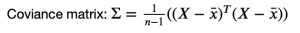

In [ ]:
pd.plotting.scatter_matrix(example_df);

In [ ]:
data_cov = np.cov(data_matrix_m0_std1)
data_cov

In [ ]:
plt.hist(data_matrix[0, :],bins = 'rice', color = 'b')
plt.hist(data_matrix_m0_std1[0, :],bins = 'rice', color = 'r')
plt.hist(data_matrix_m0[0, :],bins = 'rice', color = 'y')#ข้อมูลมีการกระจายมากขึ้น


In [ ]:
data_cov = np.cov(data_matrix_m0_std1)
data_cov

#3 คำนวณ Eigenvectors and Eigenvalues (คำนวณ eigen values-vectors)

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(data_cov)


In [ ]:
eigen_values

In [ ]:
eigen_vectors

# 4 Picking Principal Components Using the Explained Variance (เลือกมาเฉพาะ eigens ที่จำเป็น)
คำนวณว่า แต่ละ eigen vector อธิบายข้อมูลทั้งหมด ได้ดีแค่ไหน

In [ ]:
sum(eigen_values)

In [ ]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

In [ ]:
selected_eigen_vectors = eigen_vectors[:,:2]
selected_eigen_vectors

# 5   Project Data Onto Lower-Dimensional Linear Subspace (map data ไปบนแกนใหม่)

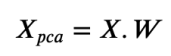

In [ ]:
X = data_matrix_m0_std1
X.shape

In [ ]:
W = selected_eigen_vectors
W.shape

In [ ]:
X_pca = X.T.dot(W)
X_pca

In [ ]:
plt.plot(X_pca[:,0],X_pca[:,1],'or')

In [ ]:
plt.plot(X_pca[:50,0],X_pca[:50,1],'or')
plt.plot(X_pca[50:100,0],X_pca[50:100,1],'og')
plt.plot(X_pca[100:,0],X_pca[100:,1],'oy')

# PCA 

#### Import

In [ ]:
from sklearn.decomposition import PCA

#### Define

In [ ]:
pca = PCA(n_components=2)

#### Fit - Transform

In [ ]:
new_pca = pca.fit_transform(X.T)  ## record - แถว  , dimension - หลัก

In [ ]:
new_pca

In [ ]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'og')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oy')

#Example

In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv('nndb_flat.csv')
data.head(10)

## ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [ ]:
data.shape

## ลอง plot scatter matrix เพื่อดูการกระจาย ของ data ใน มุมมองต่างๆ

In [ ]:
pd.plotting.scatter_matrix(data)  #dimension เยอะไปทำให้มองไม่ออก

#เนื่องจาก Data  มี dimensions มากเกินไปเราจะทดสอบดูว่า column  ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

#เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลขเลยเริ่มจากแถวที่ 7

In [ ]:
newdata = data.iloc[:,7:]  #เอาทุกแถวเริ่มตั้งแต่แถวที่ 7
newdata.head()

#ตรวจสอบว่าละหว่าง columns มี correlationกันมากน้อยแค่ไหน ด้วย numpy

In [ ]:
import numpy as np


In [ ]:
corr = np.corrcoef(newdata.to_numpy().T)

In [ ]:
corr.shape

In [ ]:
corr

In [ ]:
for i in range(corr.shape[0] ):
  for j in  range(corr.shape[1] ):
    if( i !=j) and (corr [i,j] == 1.):
      print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

In [ ]:
newdata.iloc[:5,10:30]

In [ ]:
from matplotlib import pyplot as plt

### data ที่มี  correlation เป็น 1

In [ ]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,27],'r.')

In [ ]:
plt.plot(newdata.iloc[:,10],newdata.iloc[:,10],'r.')

### data ที่มี  correlation เป็นค่าอื่นๆ

In [ ]:
plt.plot(newdata.iloc[:,11],newdata.iloc[:,29],'r.')

#ลบ column ซ้ำ  

หลัก ตั้ง  คอมลัม นอน ดูว่าซ้ำกันยังไง ดูที่ค่า cor ว่าถ้าเป็น 1 คือซ้ำกัน

In [ ]:
newdata.columns.str.contains('_USRDA')

In [ ]:
newdata.columns[newdata.columns.str.contains('_USRDA')].values

In [ ]:
newdata.drop(newdata.columns[newdata.columns.str.contains('_USRDA')].values,axis=1)

#Quiz 1 ลบ  column ที่มีค่า correlation เป็น 1 เมื่อเทียบกับ column อื่น

In [ ]:
newdata_dropped = newdata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'],axis=1)
newdata_dropped

In [ ]:
data_dropped = data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

### ทดลอง plot กราฟ parallel coordinate

In [ ]:
pd.plotting.parallel_coordinates(data_dropped,'FoodGroup',cols=['Protein_g','Fat_g','Carb_g','Sugar_g',	'Fiber_g'])

## ทำ PCA เพื่อลดจำนวน dimensions ของข้อมูล

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)

In [60]:
new_pca = pca.fit_transform(newdata_dropped.to_numpy())

In [61]:
new_pca.shape

(8618, 2)

In [62]:
new_pca

array([[ 590.95286674,   85.56968946],
       [ 590.95284476,   85.57159456],
       [ 747.5994042 ,  117.79120834],
       ...,
       [ -95.72739188,  -53.51885094],
       [ -66.70492177, -118.10632681],
       [ -65.40356382,  -28.88067151]])

### หาค่าที่เป็นไปได้ทั้งหมด

ดูว่ามี food group อะไรบ้าง

In [ ]:
FG = set(data['FoodGroup'])
FG

### สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

In [71]:
color_list = {} #เปลี่ยนชื่อ food group ให้เป็นตัวเลข
num = 0
for each_fg in FG:
    if each_fg not in color_list:
        color_list[each_fg] = num
        num += 1

In [72]:
color_list

{'American Indian/Alaska Native Foods': 3,
 'Baby Foods': 12,
 'Baked Products': 9,
 'Beef Products': 23,
 'Beverages': 18,
 'Breakfast Cereals': 19,
 'Cereal Grains and Pasta': 22,
 'Dairy and Egg Products': 14,
 'Fast Foods': 1,
 'Fats and Oils': 20,
 'Finfish and Shellfish Products': 4,
 'Fruits and Fruit Juices': 21,
 'Lamb, Veal, and Game Products': 24,
 'Legumes and Legume Products': 7,
 'Meals, Entrees, and Side Dishes': 11,
 'Nut and Seed Products': 17,
 'Pork Products': 10,
 'Poultry Products': 13,
 'Restaurant Foods': 2,
 'Sausages and Luncheon Meats': 8,
 'Snacks': 16,
 'Soups, Sauces, and Gravies': 15,
 'Spices and Herbs': 0,
 'Sweets': 5,
 'Vegetables and Vegetable Products': 6}

#สร้าง color list แบบข้างล่างนี้ ลำดับจะไม่มีการเปลี่ยนแปลง

In [76]:
FG_l = list(FG)  ### แปลงเป็น list
FG_l.sort() ###เรียงค่า สมาชิกจากน้อยไปมาก
color_list2 = {}
num = 0
 for  each_fg  in  FG_l:
   if each_fg not in color_list2:
     color_list2[each_fg] = num
     num += 1

IndentationError: ignored

### แทนค่า text ใน  Dictionary ด้วยตัวเลขที่เรากำหนด

In [55]:
data_dropped2 = data_dropped.replace(color_list)

In [56]:
data_dropped2

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,14,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,14,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,14,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,14,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,14,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,4,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,4,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,5,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,4,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


Plot กราฟ  Scatter

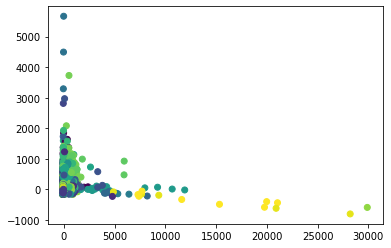

In [63]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'])

In [ ]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

### ทดลอง เปรียบเทียบค่าสารอาหาร baby food และ sweet

In [77]:
bb = data_dropped2[(data_dropped2['FoodGroup']==2) | (data_dropped2['FoodGroup']==8)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
bb

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
1591,8,173.0,15.84,8.90,6.40,0.00,0.0,3.0,0.26,1.68,0.0,9.0,55.0,0.070,1.16,0.040,21.3,0.003333,0.152941,0.700000,0.000000,0.000000,0.0225,0.141625,0.190769,0.300000,0.045833,0.000078,0.040476,0.188571,0.387273,0.223636
1592,8,277.0,14.00,22.53,3.76,0.00,0.9,3.0,0.23,1.16,0.6,5.0,27.0,0.103,1.73,0.155,17.4,0.003333,0.135294,0.483333,0.006667,0.012667,0.0125,0.185938,0.133077,0.205000,0.022500,0.000114,0.045238,0.192857,0.316364,0.200909
1593,8,238.0,14.24,18.80,2.06,0.00,0.0,0.0,0.35,0.87,0.0,3.0,8.0,0.050,0.76,0.032,20.9,0.000000,0.205882,0.362500,0.000000,0.000000,0.0075,0.203375,0.147692,0.461667,0.006667,0.000056,0.030952,0.147143,0.380000,0.156364
1594,8,230.0,15.27,17.20,2.59,2.35,0.0,0.0,0.20,2.67,0.0,5.0,12.0,0.080,1.15,0.041,14.1,0.000000,0.117647,1.112500,0.000000,0.000000,0.0125,0.194375,0.163846,0.316667,0.010000,0.000089,0.035714,0.185714,0.256364,0.224545
1595,8,379.0,14.60,34.50,1.29,1.29,0.0,0.0,0.04,1.00,0.0,5.0,6.0,0.040,6.40,0.010,15.5,0.000000,0.023529,0.416667,0.000000,0.008667,0.0125,0.075000,0.100000,0.058333,0.005000,0.000044,0.019048,0.031429,0.281818,0.118182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8436,8,241.0,18.60,16.80,2.60,0.00,0.0,1.0,0.27,0.44,0.0,4.0,18.0,0.061,1.12,0.000,27.8,0.001111,0.158824,0.183333,0.000000,0.016667,0.0100,0.205625,0.115385,0.150000,0.015000,0.000068,0.040476,0.202857,0.505455,0.198182
8441,8,295.0,18.50,24.00,0.00,0.00,0.0,31.0,0.17,0.38,0.0,4.0,11.0,0.051,1.08,0.000,14.5,0.034444,0.100000,0.158333,0.000000,0.033333,0.0100,0.253750,0.092308,0.033333,0.009167,0.000057,0.033333,0.158571,0.263636,0.157273
8449,8,121.0,15.50,2.80,8.40,0.00,0.1,1.0,0.27,0.54,0.4,3.0,12.0,0.063,0.91,0.000,22.2,0.001111,0.158824,0.225000,0.004444,0.013333,0.0075,0.197500,0.130769,0.250000,0.010000,0.000070,0.042857,0.221429,0.403636,0.175455
8551,8,310.0,11.70,28.40,2.00,0.00,0.0,0.0,0.18,1.41,0.0,5.0,12.0,0.030,1.40,0.000,11.7,0.000000,0.105882,0.587500,0.000000,0.012667,0.0125,0.164375,0.100000,0.050000,0.010000,0.000033,0.023810,0.117143,0.212727,0.181818


In [78]:
pca = PCA(n_components=2)
new_pca = pca.fit_transform(bb.iloc[:,1:].to_numpy())

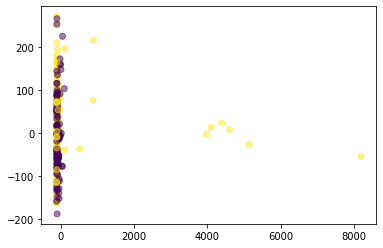

In [79]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = bb['FoodGroup'],alpha=0.5)


### 2 Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [68]:
pca.explained_variance_ratio_

array([0.93948007, 0.03451686])